# Try to understand how tridentNet was built with detectron2

## TridentNet/train_net.py:

### Train on **1 GPU**：

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run ./codes/default_argument_parser_detectron2.py \
--config-file='../projects/TridentNet/configs/tridentnet_fast_R_50_C4_1x.yaml' \
SOLVER.IMS_PER_BATCH 2 SOLVER.BASE_LR 0.0025

**Create the json file which should be registerd as a metadata and will be used by the COCO evaluator:**

In [3]:
from codes.coco_format import xml2json
xml2json('simImage/train')
xml2json('simImage/val')

**Register the dataset and the metadata:**

In [4]:
from codes.coco_format import get_simimage_dicts
from detectron2.data import DatasetCatalog, MetadataCatalog

for d in ['train','val']:
    DatasetCatalog.register('simImage/'+d, lambda d = d: get_simimage_dicts('simImage/'+d))
    DatasetCatalog.get('simImage/'+d)
    MetadataCatalog.get('simImage/'+d).set(thing_classes=['danger'])
    MetadataCatalog.get('simImage/'+d).set(json_file='simImage/'+d+'/annotations.json')
object_metadata=MetadataCatalog.get('simImage/train') 

**To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:**

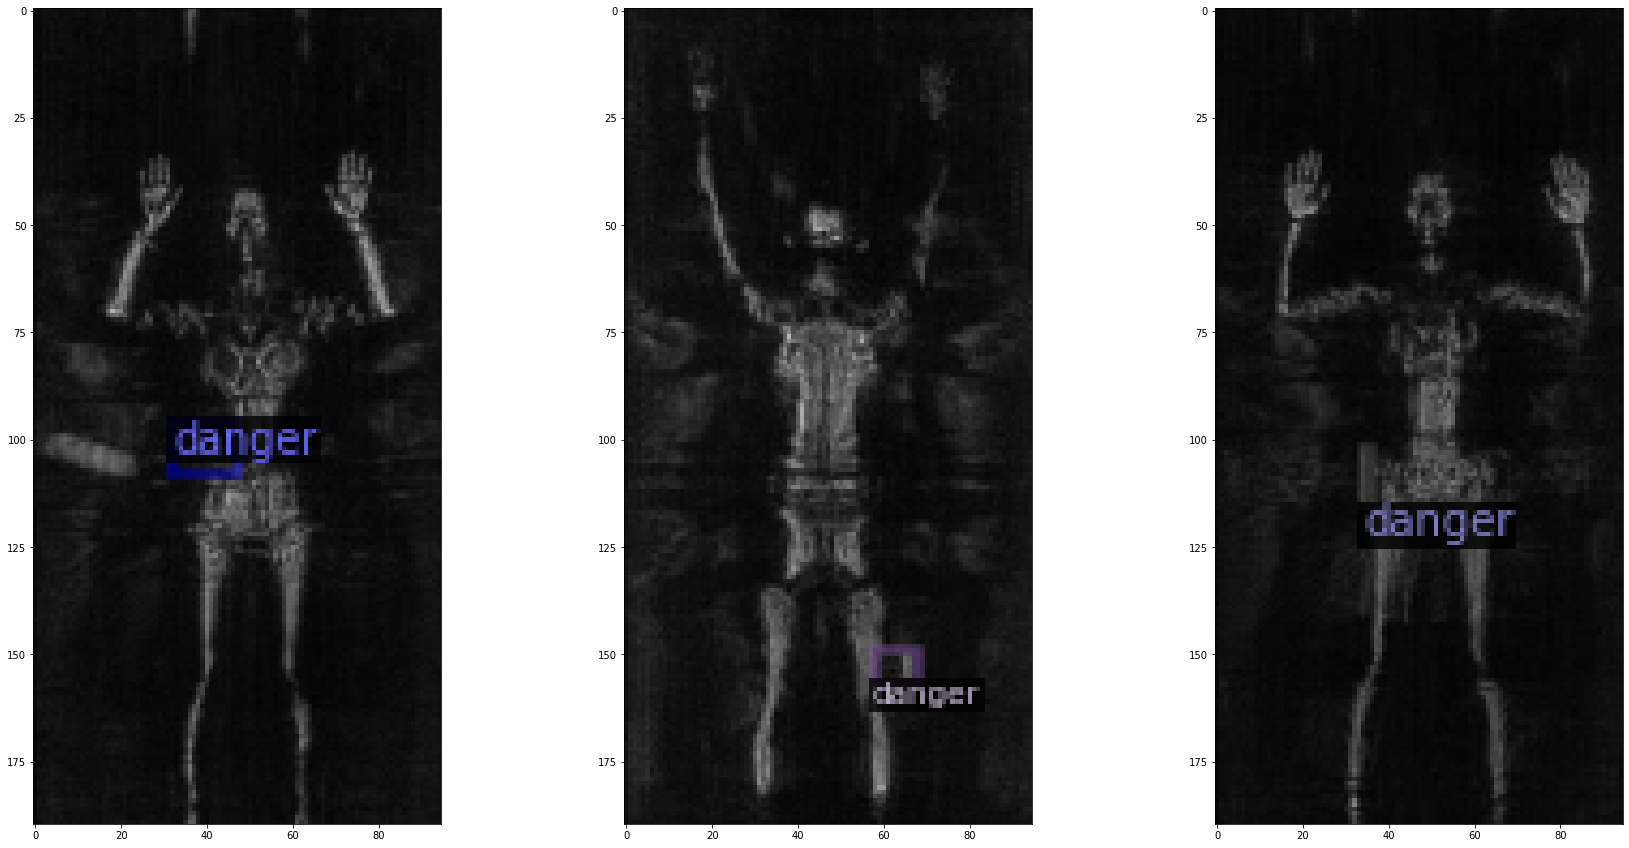

In [23]:
import random
from detectron2.utils.visualizer import Visualizer
from matplotlib import pyplot as plt
import numpy as np

dataset_dicts=get_simimage_dicts('simImage/val')
plt.figure(figsize=(30,15))
i=1
for d in random.sample(dataset_dicts,3):
    img=plt.imread(d['file_name'])
    visualizer = Visualizer(img[:,:,::-1],metadata=object_metadata,scale=0.5)
    vis=visualizer.draw_dataset_dict(d)
    plt.subplot(1,3,i)
    i+=1
    plt.imshow(vis.get_image()[:,:,::-1])

**Pull the default configs:**

In [6]:
from detectron2.config import get_cfg

In [7]:
cfg = get_cfg()

In [8]:
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ()
  TRAIN: ()
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (800,)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    SIZES: [[32, 64, 128, 256, 512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: []
    NORM: 
    OUT_CHANNELS: 256
  KEYPOINT_ON: False
  LOAD_PROPOSALS: False
  MASK_ON: False
  META_ARCHITECTURE: GeneralizedRCNN
  PANOPTIC_FPN:
   

**add custom configs:**

In [9]:
from projects.TridentNet.tridentnet import add_tridentnet_config

In [10]:
add_tridentnet_config(cfg)

In [11]:
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ()
  TRAIN: ()
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (800,)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    SIZES: [[32, 64, 128, 256, 512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_resnet_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: []
    NORM: 
    OUT_CHANNELS: 256
  KEYPOINT_ON: False
  LOAD_PROPOSALS: False
  MASK_ON: False
  META_ARCHITECTURE: GeneralizedRCNN
  PANOPTIC_FPN:
   

**merge configs from file:**

In [12]:
cfg.merge_from_file(args.config_file)

Config '../projects/TridentNet/configs/tridentnet_fast_R_50_C4_1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.


In [13]:
print(cfg)

CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('coco_2017_val',)
  TRAIN: ('coco_2017_train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    SIZES: [[32, 64, 128, 256, 512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_trident_resnet_backbone
  DEVICE: cuda
  FPN:
    FUSE_TYPE: sum
    IN_FEATURES: []
    NORM: 
    OUT_CHANNELS: 256
  KEYPOINT_ON: False
  LOAD_PROPOSALS: False
  MASK_

In [14]:
cfg.DATASETS.TRAIN = ('simImage/train',)
cfg.DATASETS.TEST = ('simImage/val',)
cfg.SOLVER.MAX_ITER = 5

**merge configs from list:**

In [15]:
cfg.merge_from_list(args.opts)

In [16]:
print(args.opts)
print(f'Keys: {args.opts[0::2]}')
print(f'Values: {args.opts[1::2]}')
print(cfg)

['SOLVER.IMS_PER_BATCH', '2', 'SOLVER.BASE_LR', '0.0025']
Keys: ['SOLVER.IMS_PER_BATCH', 'SOLVER.BASE_LR']
Values: ['2', '0.0025']
CUDNN_BENCHMARK: False
DATALOADER:
  ASPECT_RATIO_GROUPING: True
  NUM_WORKERS: 4
  REPEAT_THRESHOLD: 0.0
  SAMPLER_TRAIN: TrainingSampler
DATASETS:
  PRECOMPUTED_PROPOSAL_TOPK_TEST: 1000
  PRECOMPUTED_PROPOSAL_TOPK_TRAIN: 2000
  PROPOSAL_FILES_TEST: ()
  PROPOSAL_FILES_TRAIN: ()
  TEST: ('simImage/val',)
  TRAIN: ('simImage/train',)
GLOBAL:
  HACK: 1.0
INPUT:
  CROP:
    ENABLED: False
    SIZE: [0.9, 0.9]
    TYPE: relative_range
  FORMAT: BGR
  MASK_FORMAT: polygon
  MAX_SIZE_TEST: 1333
  MAX_SIZE_TRAIN: 1333
  MIN_SIZE_TEST: 800
  MIN_SIZE_TRAIN: (640, 672, 704, 736, 768, 800)
  MIN_SIZE_TRAIN_SAMPLING: choice
MODEL:
  ANCHOR_GENERATOR:
    ANGLES: [[-90, 0, 90]]
    ASPECT_RATIOS: [[0.5, 1.0, 2.0]]
    NAME: DefaultAnchorGenerator
    SIZES: [[32, 64, 128, 256, 512]]
  BACKBONE:
    FREEZE_AT: 2
    NAME: build_trident_resnet_backbone
  DEVICE: cuda
  

**make this CfgNode and all of its children immutable:**

In [17]:
cfg.freeze()

**Log basic information about environment, cmdline arguments, and config and backup the config：**

In [18]:
from detectron2.engine import default_setup

In [19]:
?default_setup

Signature: default_setup(cfg, args)
Docstring:
Perform some basic common setups at the beginning of a job, including:

1. Set up the detectron2 logger
2. Log basic information about environment, cmdline arguments, and config
3. Backup the config to the output directory

Args:
    cfg (CfgNode): the full config to be used
    args (argparse.NameSpace): the command line arguments to be logged
File:      /detectron2_repo/detectron2/engine/defaults.py
Type:      function


In [20]:
default_setup(cfg, args)

[11/21 01:44:40 detectron2]: Rank of current process: 0. World size: 1
[11/21 01:44:41 detectron2]: Environment info:
------------------------  --------------------------------------------------
sys.platform              linux
Python                    3.6.8 (default, Oct  7 2019, 12:59:55) [GCC 8.3.0]
Numpy                     1.13.3
Detectron2 Compiler       GCC 7.4
Detectron2 CUDA Compiler  10.1
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.3.0
PyTorch Debug Build       False
torchvision               0.4.1
CUDA available            True
GPU 0                     GeForce GTX 1060 6GB
CUDA_HOME                 /usr/local/cuda
NVCC                      Cuda compilation tools, release 10.1, V10.1.243
Pillow                    6.2.0
cv2                       3.2.0
------------------------  --------------------------------------------------
PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architectu

**Define the custom evaluator:**

In [21]:
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, verify_results
from detectron2.checkpoint import DetectionCheckpointer

class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, cfg, True, output_folder)

Train on **1 GPU**:

In [22]:
trainer = Trainer(cfg)
trainer.resume_or_load(resume=args.resume)
# trainer.resume_or_load(resume=True)
trainer.train()

[11/21 01:44:47 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

OrderedDict([('bbox',
              {'AP': 0.0,
               'AP50': 0.0,
               'AP75': 0.0,
               'APl': -100.0,
               'APm': 0.0,
               'APs': 0.0})])

**Perform inference with the trained model on the simImage dataset:**

In [40]:
from detectron2.engine import DefaultPredictor

cfg.defrost()
cfg.MODEL.WEIGHTS=os.path.join(cfg.OUTPUT_DIR,'model_final.pth')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST=0.15
cfg.DATASETS.TEST=('simImage/val')
predictor = DefaultPredictor(cfg)

[11/21 02:00:18 fvcore.common.checkpoint]: Loading checkpoint from ./output/model_final.pth


**Visualize the prediction results:**

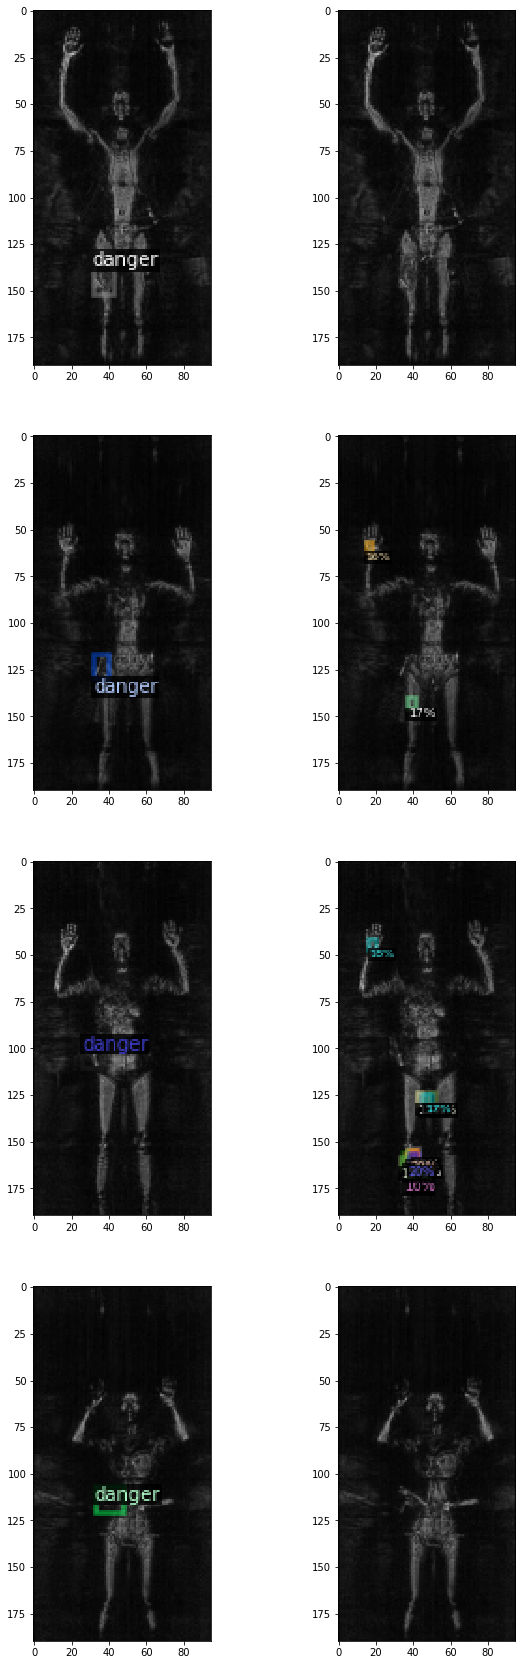

In [42]:
from detectron2.utils.visualizer import ColorMode

dataset_dicts = get_simimage_dicts('simImage/val')
i=1
plt.figure(figsize=(10,30))
for d in random.sample(dataset_dicts, 4):
    im = plt.imread(d['file_name'])
    outputs = predictor(im)
#     print(outputs)
    v = Visualizer(im[:,:,::-1],
                   metadata=object_metadata,
                   scale=0.5
    )
    vis = Visualizer(im[:,:,::-1],
                   metadata=object_metadata,
                   scale=0.5
    )
    v = v.draw_dataset_dict(d)
    vis = vis.draw_instance_predictions(outputs['instances'].to('cpu'))
    plt.subplot(4,2,i)
    plt.imshow(v.get_image()[:,:,::-1])
    plt.subplot(4,2,i+1)
    plt.imshow(vis.get_image()[:,:,::-1])
    i += 2

### If evaluator only:

In [54]:
%run ./codes/default_argument_parser_detectron2.py \
--config-file='../projects/TridentNet/configs/tridentnet_fast_R_50_C4_1x.yaml' \
--eval-only --resume \
SOLVER.IMS_PER_BATCH 2 SOLVER.BASE_LR 0.0025 

In [58]:
cfg = get_cfg()
add_tridentnet_config(cfg)
cfg.merge_from_file(args.config_file)
cfg.merge_from_list(args.opts)
cfg.DATASETS.TRAIN = ('simImage/train',)
cfg.DATASETS.TEST = ('simImage/val',)
cfg.SOLVER.MAX_ITER = 5
cfg.freeze()
default_setup(cfg, args)

WARNING [11/21 03:12:45 d2.config.compat]: Config '../projects/TridentNet/configs/tridentnet_fast_R_50_C4_1x.yaml' has no VERSION. Assuming it to be compatible with latest v2.
[11/21 03:12:45 detectron2]: Rank of current process: 0. World size: 1
[11/21 03:12:45 detectron2]: Environment info:
------------------------  --------------------------------------------------
sys.platform              linux
Python                    3.6.8 (default, Oct  7 2019, 12:59:55) [GCC 8.3.0]
Numpy                     1.13.3
Detectron2 Compiler       GCC 7.4
Detectron2 CUDA Compiler  10.1
DETECTRON2_ENV_MODULE     <not set>
PyTorch                   1.3.0
PyTorch Debug Build       False
torchvision               0.4.1
CUDA available            True
GPU 0                     GeForce GTX 1060 6GB
CUDA_HOME                 /usr/local/cuda
NVCC                      Cuda compilation tools, release 10.1, V10.1.243
Pillow                    6.2.0
cv2                       3.2.0
------------------------  ------

In [62]:
import detectron2.utils.comm as comm

if args.eval_only:
    model = Trainer.build_model(cfg)
    DetectionCheckpointer(model, save_dir=cfg.OUTPUT_DIR).resume_or_load(
        cfg.MODEL.WEIGHTS, resume=args.resume
    )
    res = Trainer.test(cfg, model)
    if comm.is_main_process():
            verify_results(cfg, res)

[11/21 03:15:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

In [67]:
?Trainer.test

Signature: Trainer.test(cfg, model, evaluators=None)
Docstring:
Args:
    cfg (CfgNode):
    model (nn.Module):
    evaluators (list[DatasetEvaluator] or None): if None, will call
        :meth:`build_evaluator`. Otherwise, must have the same length as
        `cfg.DATASETS.TEST`.

Returns:
    dict: a dict of result metrics
File:      /detectron2_repo/detectron2/engine/defaults.py
Type:      method


In [69]:
?comm.is_main_process()

Signature: comm.is_main_process() -> bool
Docstring: <no docstring>
File:      /detectron2_repo/detectron2/utils/comm.py
Type:      function


In [63]:
comm.is_main_process()

True

In [68]:
?verify_results

Signature: verify_results(cfg, results)
Docstring:
Args:
    results (OrderedDict[dict]): task_name -> {metric -> score}

Returns:
    bool: whether the verification succeeds or not
File:      /detectron2_repo/detectron2/evaluation/testing.py
Type:      function


In [65]:
verify_results(cfg, res)

True